# Pandas Basics <hr style = "border: 2.5px solid#efd7a9"></hr>

Data Analyst: Hannah Lyrane P. Ibanez <br>
Department: Electrical Engineering

In [57]:
# import and packages
#import pandas as pd
#import matplotlib.pyplot as plt
from scipy import stats

In [37]:
#%pip install pandas --upgrade

In [38]:
#%pip install matplotlib --upgrade

# DataFrame

In [39]:
data = {
    "name": ["Doni", "Yangyang", "Liebe"],
    "age" : [5, 4, 22],
    "sex": ["M","M","M"]
}
data

{'name': ['Doni', 'Yangyang', 'Liebe'],
 'age': [5, 4, 22],
 'sex': ['M', 'M', 'M']}

In [40]:
dr = pd.DataFrame(data)
dr

,name,age,sex
0,Doni,5,M
1,Yangyang,4,M
2,Liebe,22,M


In [41]:
dr["age"]

0     5
1     4
2    22
Name: age, dtype: int64

In [42]:
dr['age'].sum()

np.int64(31)

# Correlation

In [67]:
device = {
    "current": [2, 3.5, 1.8, 4.2, 2.7],
    "power" : [100, 200, 90, 210, 110]
}
device

{'current': [2, 3.5, 1.8, 4.2, 2.7], 'power': [100, 200, 90, 210, 110]}

In [68]:
df = pd.DataFrame(device)
df

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [45]:
df.cov()

,current,power
current,1.023,56.15
power,56.150,3370.00


In [46]:
df.corr()

,current,power
current,1.000000,0.956306
power,0.956306,1.000000


In [47]:
df.describe()

,current,power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


## Scatter Plot

In [66]:
type (m)

numpy.float64

In [65]:
type (x)

pandas.core.series.Series

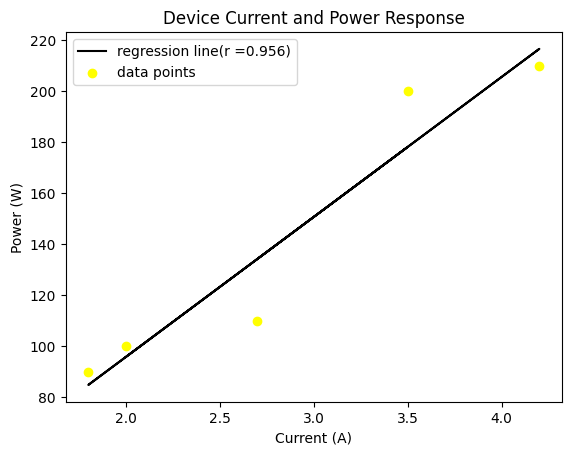

In [81]:
x= df["current"]
y= df["power"]

# regression line
m, b, r, p_value, std_err = stats.linregress(x,y)
line = m*x + b

plt.plot(x,line,
         color= "k",
        label= f"regression line(r ={r:.3f})" )

#scatter
plt.scatter(x,y,
            color= "yellow",
            label= "data points")
plt.title("Device Current and Power Response")
plt.ylabel ("Power (W)" )
plt.xlabel ("Current (A)")
plt.legend()
plt.show()

# Resistance Test

In [83]:
resistance = pd.read_csv(r"resistance-test.csv" )
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [2]:
#resistance.info()

In [100]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

np.float64(9.399999999999999)

In [96]:
pan_mean = resistance['Panther'].mean()
pan_mean

np.float64(10.75)

In [97]:
resistance["Panther"] = resistance["Panther"].fillna(pan_mean)

In [98]:
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.10
1,2,9.1,11.00
2,3,9.3,9.10
3,4,9.8,20.00
4,5,10.5,9.20
5,6,10.4,10.80
6,7,9.5,9.90
7,8,11.0,9.20
8,9,10.4,9.10
9,10,3.0,9.10


# Bar Graph

<function matplotlib.pyplot.show(close=None, block=None)>

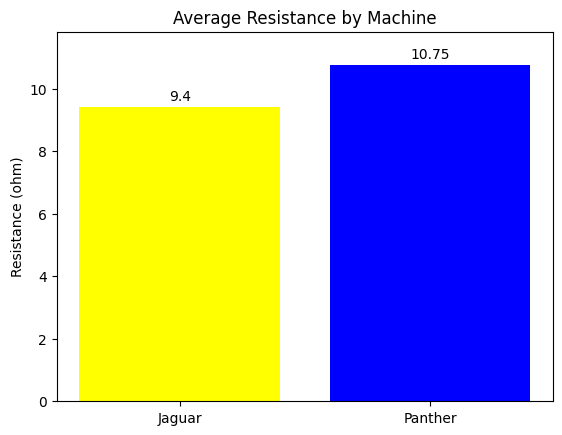

In [114]:
bars = plt.bar(["Jaguar","Panther"],[jag_mean,pan_mean],
               color= ["yellow","blue"])
plt.title ('Average Resistance by Machine')
plt.ylabel ("Resistance (ohm)")

# bar labels
plt.bar_label(bars, padding=3)
plt.margins(y=0.1) #10%

plt.show